# Setup
Read in Sierra Leone Reproductive Health Reporting Rate from CSV file extracted from DHIS2. This will allow us to test for seasonality. We use the data from 2023 and 2024, there is no data prior to 2023 to run a longer-term test.

In [ ]:
df <- read.csv("data.csv")
head(df)

,Data,Period,Value,Numerator,Denominator,Factor,Multiplier,Divisor
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<lgl>,<lgl>
1,QX4ZTUbOt3a.REPORTING_RATE,September 2024,88.24,1020,1156,100,NA,NA
2,QX4ZTUbOt3a.REPORTING_RATE,September 2023,88.24,1020,1156,100,NA,NA
3,QX4ZTUbOt3a.REPORTING_RATE,August 2024,90.40,1045,1156,100,NA,NA
4,QX4ZTUbOt3a.REPORTING_RATE,August 2023,90.40,1045,1156,100,NA,NA
5,QX4ZTUbOt3a.REPORTING_RATE,July 2024,89.62,1036,1156,100,NA,NA
6,QX4ZTUbOt3a.REPORTING_RATE,July 2023,89.62,1036,1156,100,NA,NA


Install the 'seastests' library for seasonal testing.

In [ ]:
install.packages("seastests")
library(seastests)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘xts’, ‘zoo’, ‘forecast’




Format data into a time series.

In [ ]:
data_ts <- ts(df$Value, start=c(2023, 1), end=c(2024,12), frequency=12)
data_ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,88.24,88.24,90.40,90.40,89.62,89.62,89.27,89.27,86.51,86.51,85.81,88.32
2024,85.99,89.10,84.17,84.17,81.40,66.96,81.40,66.96,69.90,75.00,71.11,74.39


In [ ]:
isSeasonal(data_ts, test = "fried")
isSeasonal(data_ts, test = "kw")
isSeasonal(data_ts, test = "seasdum")
isSeasonal(data_ts, test = "welch")
isSeasonal(data_ts, test = "qs", freq = 2)

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

The Friedman, Kruskall-Wallis, F-test on seasonal summies, and Welch test all return False for seasonality.

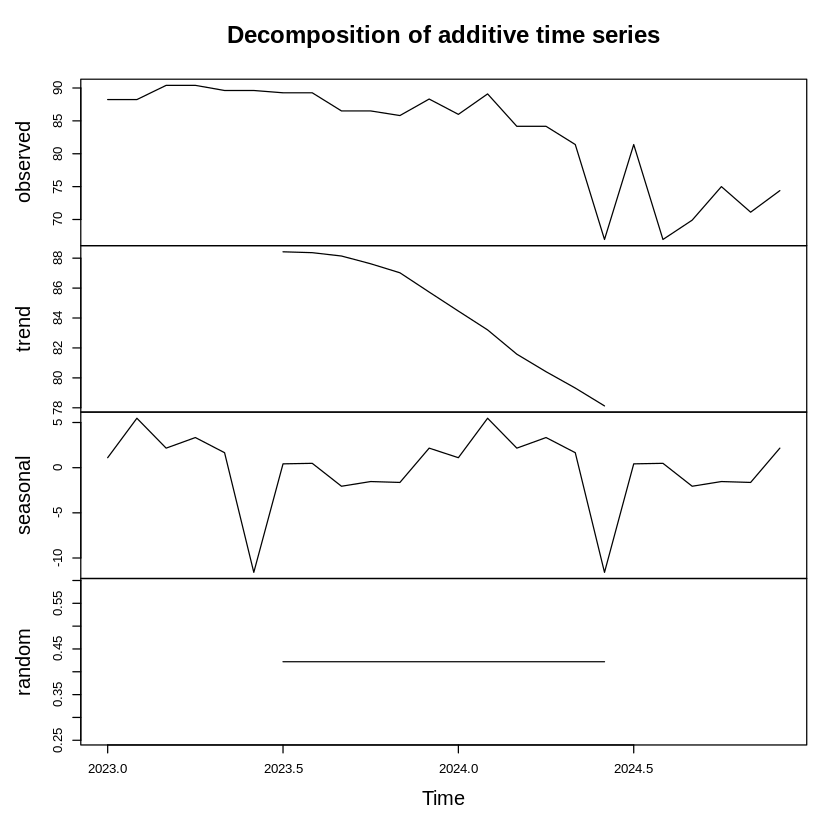

In [ ]:
components <- decompose(data_ts)
plot(components)

In [ ]:
install.packages("forecast")
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



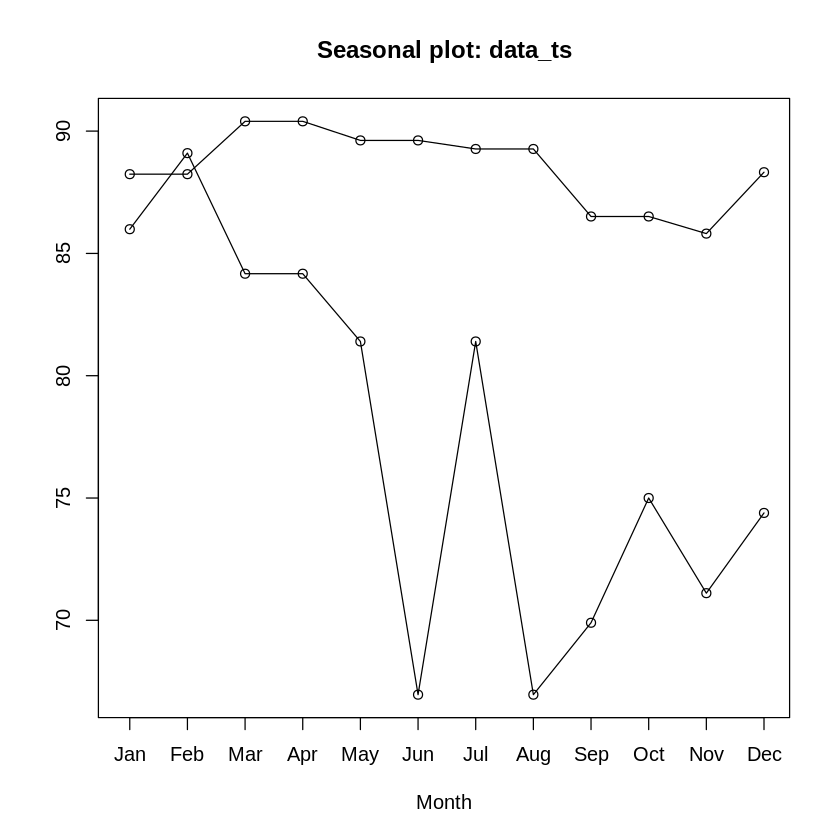

In [ ]:
seasonplot(data_ts)

In [ ]:
install.packages("tidyverse")
library(tidyverse)
install.packages("tseries")
library(tseries)
install.packages("MLmetrics")
library(MLmetrics)
library(ggplot2)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
HW <- HoltWinters(data_ts)
HW2 <- HoltWinters(data_ts, alpha=0.2)

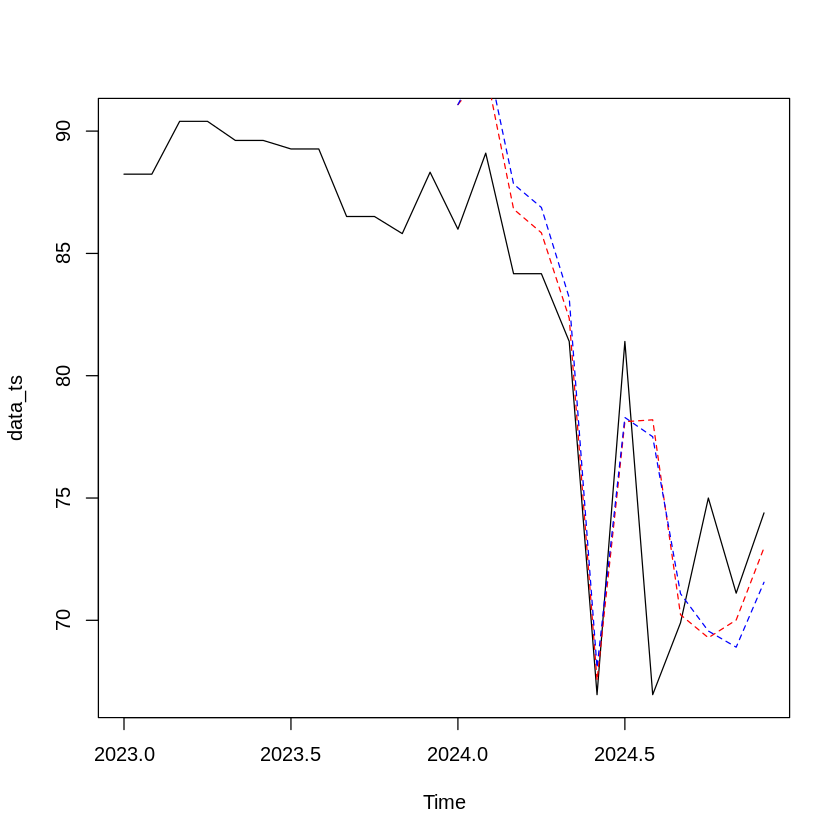

In [ ]:
plot(data_ts)
lines(HW$fitted[,1], lty=2, col="red")
lines(HW2$fitted[,1], lty=2, col="blue")

In [ ]:
AA <- auto.arima(data_ts)

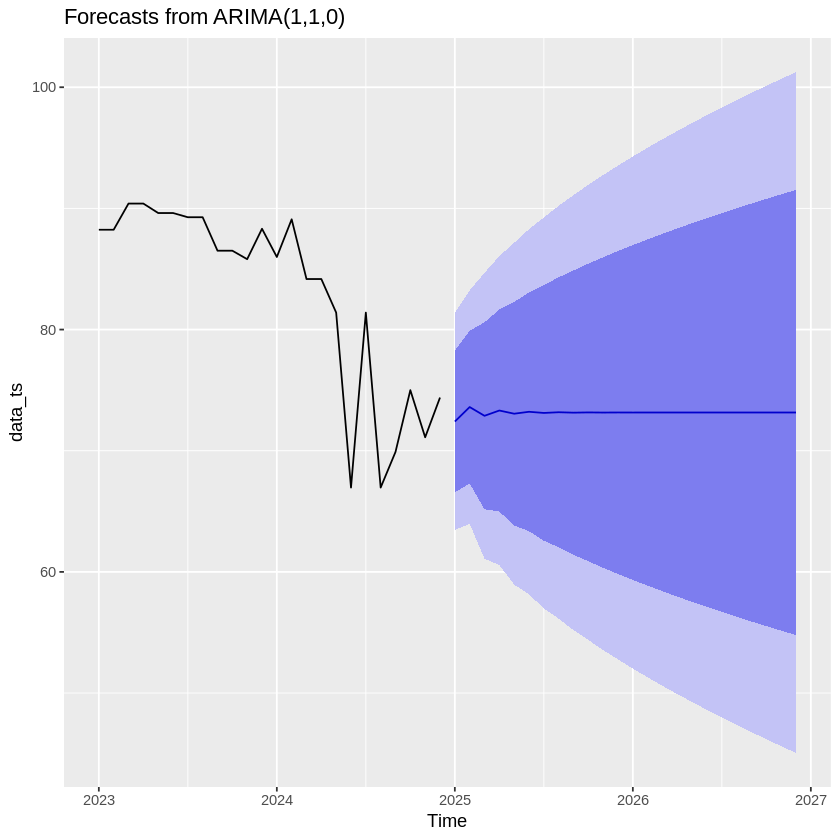

In [ ]:
autoplot(forecast(AA))